In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge/sample_submission.csv
/kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge/train.csv
/kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge/test.csv


In [2]:
import numpy as np # data analysis
import pandas as pd # mathematical functions,vectors
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler # to standardization
from sklearn.model_selection import train_test_split, GridSearchCV # to select best KNN parameters
from sklearn.metrics import accuracy_score, confusion_matrix # to learn where did we wrong
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap,TSNE
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook import tqdm
from scipy.stats import ttest_ind
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats
import plotly.figure_factory as ff
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge/sample_submission.csv
/kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge/train.csv
/kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge/test.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge/train.csv')

I am dropping few columns which according to me are not necessary at the moment

In [4]:
df_train.drop("Patient Id",axis=1,inplace=True)
df_train.drop("Family Name",axis=1,inplace=True)
df_train.drop("Patient First Name",axis=1,inplace=True)
df_train.drop("Father's name",axis=1,inplace=True)
df_train.drop("Institute Name",axis=1,inplace=True)
df_train.drop("Location of Institute",axis=1,inplace=True)
df_train.drop("Place of birth",axis=1,inplace=True)
df_train.drop("Test 1",axis=1,inplace=True)
df_train.drop("Test 2",axis=1,inplace=True)
df_train.drop("Test 3",axis=1,inplace=True)
df_train.drop("Test 4",axis=1,inplace=True)
df_train.drop("Test 5",axis=1,inplace=True)
df_train.drop("Symptom 1",axis=1,inplace=True)
df_train.drop("Symptom 2",axis=1,inplace=True)
df_train.drop("Symptom 3",axis=1,inplace=True)
df_train.drop("Symptom 4",axis=1,inplace=True)
df_train.drop("Symptom 5",axis=1,inplace=True)

In [8]:
df_train.rename(columns={"Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene",
                    "Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [9]:
df_train.head(2)

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,No,No,No,Yes,NaN,NaN,9.857562,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,NaN,Cystic fibrosis


In [10]:
unique_values_genetic_disease = df_train['Genetic_Disorder'].unique()
unique_values_genetic_disease

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [11]:
#Change not applicable to nan

df_train["Autopsy_Birth_Defect"] = df_train["Autopsy_Birth_Defect"].replace("None",np.NaN)
df_train["Autopsy_Birth_Defect"] = df_train["Autopsy_Birth_Defect"].replace("Not applicable",np.NaN)
df_train['Birth_Asphyxia'].replace('Not available', np.NaN, inplace=True)
df_train['Birth_Asphyxia'].replace('No record', np.NaN, inplace=True)
df_train['Radiation_Exposure'].replace('Not applicable', np.NaN, inplace=True)
df_train['Substance_Abuse'].replace('Not applicable', np.NaN, inplace=True)
df_train['Radiation_Exposure'].replace('-', np.NaN, inplace=True)
df_train['Substance_Abuse'].replace('-', np.NaN, inplace=True)
df_train['Follow_Up'].replace('NaN', 'nan', inplace=True)
unique_values_subclass = df_train['Substance_Abuse'].unique()
#unique_values_subclass = df_train['Parental_Consent'].unique()
#unique_values_subclass = df_train['Parental_Consent'].unique()
unique_values_subclass

array(['No', nan, 'Yes'], dtype=object)

In [12]:
df_train.isna().sum()

Patient_Age                      1427
Genes_Mother_Side                   0
Inherited_Father                  306
Maternal_Gene                    2810
Paternal_Gene                       0
Blood_Cell_mcL                      0
Mother_Age                       6036
Father_Age                       5986
Status                              0
Respiratory_Rate_Breaths_Min     2149
Heart_Rates_Min                  2113
Parental_Consent                 2125
Follow_Up                        2166
Gender                           2173
Birth_Asphyxia                  12133
Autopsy_Birth_Defect            15475
Folic_Acid                       2117
Maternal_Illness                 2152
Radiation_Exposure              12098
Substance_Abuse                 12075
Assisted_Conception              2122
History_Previous_Pregnancies     2172
Previous_Abortion                2162
Birth_Defects                    2154
White_Blood_Cell                 2148
Blood_Test_Result                2145
Genetic_Diso

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   20656 non-null  float64
 1   Genes_Mother_Side             22083 non-null  object 
 2   Inherited_Father              21777 non-null  object 
 3   Maternal_Gene                 19273 non-null  object 
 4   Paternal_Gene                 22083 non-null  object 
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    16047 non-null  float64
 7   Father_Age                    16097 non-null  float64
 8   Status                        22083 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19934 non-null  object 
 10  Heart_Rates_Min               19970 non-null  object 
 11  Parental_Consent              19958 non-null  object 
 12  Follow_Up                     19917 non-null  object 
 13  G

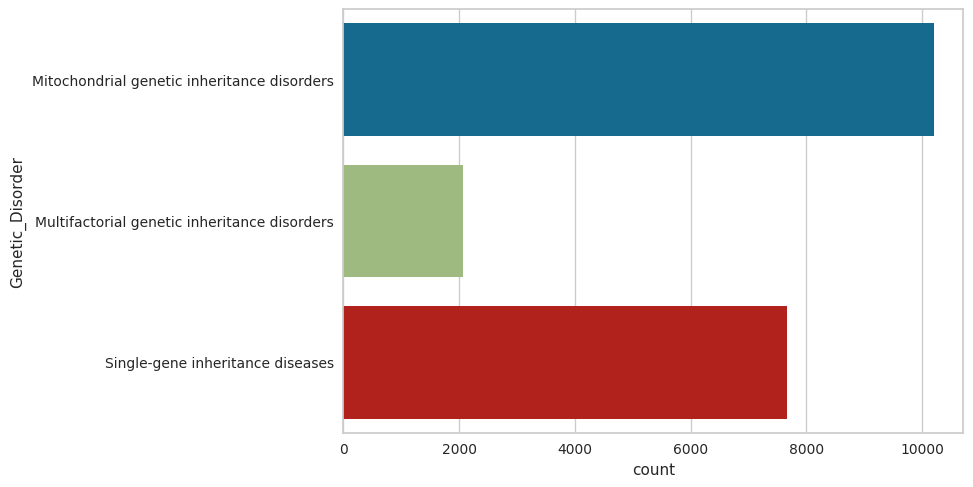

In [14]:
#sns.countplot(x = df_train.Genetic_Disorder)#x overlaps labels
sns.countplot(y = df_train.Genetic_Disorder)
plt.show()

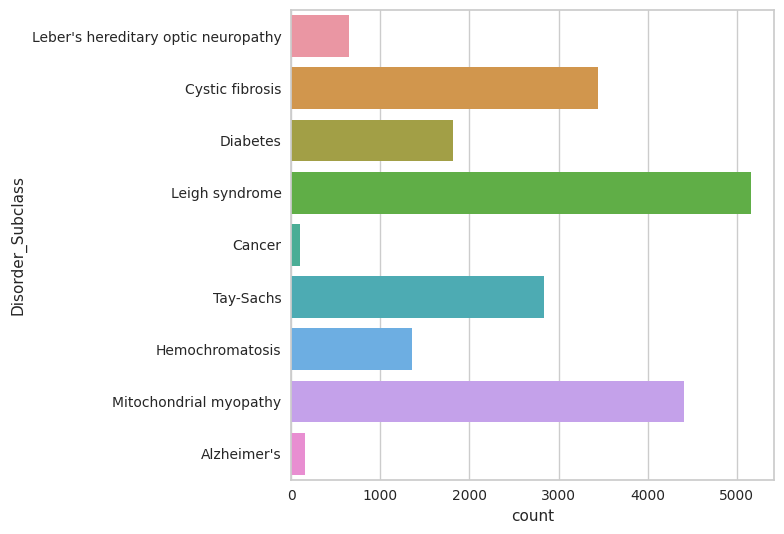

In [15]:
sns.countplot(y = df_train.Disorder_Subclass)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_train)
categorical_columns = categorical_columns_selector(df_train)


In [17]:
numerical_columns

['Patient_Age',
 'Blood_Cell_mcL',
 'Mother_Age',
 'Father_Age',
 'Previous_Abortion',
 'White_Blood_Cell']

In [18]:
categorical_columns

['Genes_Mother_Side',
 'Inherited_Father',
 'Maternal_Gene',
 'Paternal_Gene',
 'Status',
 'Respiratory_Rate_Breaths_Min',
 'Heart_Rates_Min',
 'Parental_Consent',
 'Follow_Up',
 'Gender',
 'Birth_Asphyxia',
 'Autopsy_Birth_Defect',
 'Folic_Acid',
 'Maternal_Illness',
 'Radiation_Exposure',
 'Substance_Abuse',
 'Assisted_Conception',
 'History_Previous_Pregnancies',
 'Birth_Defects',
 'Blood_Test_Result',
 'Genetic_Disorder',
 'Disorder_Subclass']

In [19]:
def datasetShape(df):
    rows, cols = df.shape
    print("The dataframe has",rows,"rows and",cols,"columns.")

In [20]:
# so using this code we just applied dummies on categories and not numerical features
cat_col = "Genes_Mother_Side", 'Inherited_Father', 'Maternal_Gene', 'Paternal_Gene',  'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception', 'History_Previous_Pregnancies','Birth_Defects', 'Blood_Test_Result'
for feat in cat_col:
    dummyVars = pd.get_dummies(df_train[feat], drop_first=True, prefix=feat+"_")
    df_train = pd.concat([df_train, dummyVars], axis=1)
    df_train.drop(feat, axis=1, inplace=True)
datasetShape(df_train)

df_train.head()

The dataframe has 22083 rows and 30 columns.


,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genetic_Disorder,Disorder_Subclass,Genes_Mother_Side__Yes,Inherited_Father__Yes,...,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes,Birth_Defects__Singular,Blood_Test_Result__inconclusive,Blood_Test_Result__normal,Blood_Test_Result__slightly abnormal
0,2.0,4.760603,NaN,NaN,NaN,9.857562,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,True,False,...,False,False,False,False,False,True,False,False,False,False
1,4.0,4.910669,NaN,23.0,NaN,5.522560,NaN,Cystic fibrosis,True,True,...,True,True,False,False,False,True,False,False,True,False
2,6.0,4.893297,41.0,22.0,4.0,NaN,Multifactorial genetic inheritance disorders,Diabetes,True,False,...,True,False,True,False,True,True,True,False,True,False
3,12.0,4.705280,21.0,NaN,1.0,7.919321,Mitochondrial genetic inheritance disorders,Leigh syndrome,True,False,...,False,True,False,False,False,True,True,True,False,False
4,11.0,4.720703,32.0,NaN,4.0,4.098210,Multifactorial genetic inheritance disorders,Cancer,True,False,...,False,True,False,False,True,False,False,False,False,False


In [21]:
df_train.head(2)

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genetic_Disorder,Disorder_Subclass,Genes_Mother_Side__Yes,Inherited_Father__Yes,...,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes,Birth_Defects__Singular,Blood_Test_Result__inconclusive,Blood_Test_Result__normal,Blood_Test_Result__slightly abnormal
0,2.0,4.760603,NaN,NaN,NaN,9.857562,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,True,False,...,False,False,False,False,False,True,False,False,False,False
1,4.0,4.910669,NaN,23.0,NaN,5.522560,NaN,Cystic fibrosis,True,True,...,True,True,False,False,False,True,False,False,True,False


In [22]:
df_train.isna().sum()

Patient_Age                                1427
Blood_Cell_mcL                                0
Mother_Age                                 6036
Father_Age                                 5986
Previous_Abortion                          2162
White_Blood_Cell                           2148
Genetic_Disorder                           2146
Disorder_Subclass                          2168
Genes_Mother_Side__Yes                        0
Inherited_Father__Yes                         0
Maternal_Gene__Yes                            0
Paternal_Gene__Yes                            0
Status__Deceased                              0
Respiratory_Rate_Breaths_Min__Tachypnea       0
Heart_Rates_Min__Tachycardia                  0
Follow_Up__Low                                0
Gender__Female                                0
Gender__Male                                  0
Birth_Asphyxia__Yes                           0
Autopsy_Birth_Defect__Yes                     0
Folic_Acid__Yes                         

In [23]:
df_train['Mother_Age'].fillna(df_train['Mother_Age'].mean(), inplace=True)
df_train['Patient_Age'].fillna(df_train['Patient_Age'].mean(), inplace=True)
df_train['Father_Age'].fillna(df_train['Father_Age'].mean(), inplace=True)
df_train['Previous_Abortion'].fillna(df_train['Previous_Abortion'].mean(), inplace=True)
df_train['White_Blood_Cell'].fillna(df_train['White_Blood_Cell'].mean(), inplace=True)

In [24]:
#lets try model as well
#need to calculate the mode of the column and then pass the scalar to the fillna() method.
mode = df_train['Mother_Age'].mode().values[0]
df_train['Mother_Age'].fillna(value=mode, inplace=True)

mode = df_train['Patient_Age'].mode().values[0]
df_train['Patient_Age'].fillna(value=mode, inplace=True)

mode = df_train['Father_Age'].mode().values[0]
df_train['Father_Age'].fillna(value=mode, inplace=True)

mode = df_train['Previous_Abortion'].mode().values[0]
df_train['Previous_Abortion'].fillna(value=mode, inplace=True)

mode = df_train['White_Blood_Cell'].mode().values[0]
df_train['White_Blood_Cell'].fillna(value=mode, inplace=True)

In [25]:
#df_train_encode.isna().sum()
df_train.isna().sum()

Patient_Age                                   0
Blood_Cell_mcL                                0
Mother_Age                                    0
Father_Age                                    0
Previous_Abortion                             0
White_Blood_Cell                              0
Genetic_Disorder                           2146
Disorder_Subclass                          2168
Genes_Mother_Side__Yes                        0
Inherited_Father__Yes                         0
Maternal_Gene__Yes                            0
Paternal_Gene__Yes                            0
Status__Deceased                              0
Respiratory_Rate_Breaths_Min__Tachypnea       0
Heart_Rates_Min__Tachycardia                  0
Follow_Up__Low                                0
Gender__Female                                0
Gender__Male                                  0
Birth_Asphyxia__Yes                           0
Autopsy_Birth_Defect__Yes                     0
Folic_Acid__Yes                         

In [26]:
columns = df_train.columns.tolist()

In [27]:
columns

['Patient_Age',
 'Blood_Cell_mcL',
 'Mother_Age',
 'Father_Age',
 'Previous_Abortion',
 'White_Blood_Cell',
 'Genetic_Disorder',
 'Disorder_Subclass',
 'Genes_Mother_Side__Yes',
 'Inherited_Father__Yes',
 'Maternal_Gene__Yes',
 'Paternal_Gene__Yes',
 'Status__Deceased',
 'Respiratory_Rate_Breaths_Min__Tachypnea',
 'Heart_Rates_Min__Tachycardia',
 'Follow_Up__Low',
 'Gender__Female',
 'Gender__Male',
 'Birth_Asphyxia__Yes',
 'Autopsy_Birth_Defect__Yes',
 'Folic_Acid__Yes',
 'Maternal_Illness__Yes',
 'Radiation_Exposure__Yes',
 'Substance_Abuse__Yes',
 'Assisted_Conception__Yes',
 'History_Previous_Pregnancies__Yes',
 'Birth_Defects__Singular',
 'Blood_Test_Result__inconclusive',
 'Blood_Test_Result__normal',
 'Blood_Test_Result__slightly abnormal']

In [28]:
notna_msk = df_train['Genetic_Disorder'].notna()
#cols = ['Age', 'Fare', 'Group_Size', 'deck', 'Pclass', 'Title', 'Survive']
new_df = df_train.loc[notna_msk, columns]
#new_df

In [30]:
notna_msk = new_df['Disorder_Subclass'].notna()
new_df = new_df.loc[notna_msk, columns]
#new_df

In [31]:
df_train.isna().sum()
#df_train.shape

Patient_Age                                   0
Blood_Cell_mcL                                0
Mother_Age                                    0
Father_Age                                    0
Previous_Abortion                             0
White_Blood_Cell                              0
Genetic_Disorder                           2146
Disorder_Subclass                          2168
Genes_Mother_Side__Yes                        0
Inherited_Father__Yes                         0
Maternal_Gene__Yes                            0
Paternal_Gene__Yes                            0
Status__Deceased                              0
Respiratory_Rate_Breaths_Min__Tachypnea       0
Heart_Rates_Min__Tachycardia                  0
Follow_Up__Low                                0
Gender__Female                                0
Gender__Male                                  0
Birth_Asphyxia__Yes                           0
Autopsy_Birth_Defect__Yes                     0
Folic_Acid__Yes                         

In [32]:
new_df.isna().sum()
#new_df.shape

Patient_Age                                0
Blood_Cell_mcL                             0
Mother_Age                                 0
Father_Age                                 0
Previous_Abortion                          0
White_Blood_Cell                           0
Genetic_Disorder                           0
Disorder_Subclass                          0
Genes_Mother_Side__Yes                     0
Inherited_Father__Yes                      0
Maternal_Gene__Yes                         0
Paternal_Gene__Yes                         0
Status__Deceased                           0
Respiratory_Rate_Breaths_Min__Tachypnea    0
Heart_Rates_Min__Tachycardia               0
Follow_Up__Low                             0
Gender__Female                             0
Gender__Male                               0
Birth_Asphyxia__Yes                        0
Autopsy_Birth_Defect__Yes                  0
Folic_Acid__Yes                            0
Maternal_Illness__Yes                      0
Radiation_

In [33]:
print("Train Missing:",new_df.isna().any().sum())

Train Missing: 0


In [34]:
#SEPARATING DATA BY TARGETS
Genetic_Disorder_Data = new_df.drop("Disorder_Subclass",axis=1)

In [27]:
Genetic_Disorder_Data.head(2)
#Genetic_Disorder_Data.shape

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genetic_Disorder,Genes_Mother_Side__Yes,Inherited_Father__Yes,Maternal_Gene__Yes,...,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes,Birth_Defects__Singular,Blood_Test_Result__inconclusive,Blood_Test_Result__normal,Blood_Test_Result__slightly abnormal
0,2.0,4.760603,34.526454,41.972852,2.003062,9.857562,Mitochondrial genetic inheritance disorders,True,False,True,...,False,False,False,False,False,True,False,False,False,False
2,6.0,4.893297,41.000000,22.000000,4.000000,7.486224,Multifactorial genetic inheritance disorders,True,False,False,...,True,False,True,False,True,True,True,False,True,False


In [35]:
# convert Genetic Disorder to label-encoding
import sklearn.preprocessing as skp

gdle = skp.LabelEncoder()
Genetic_Disorder_Data['Genetic_Disorder'] = gdle.fit_transform(Genetic_Disorder_Data['Genetic_Disorder'])

In [36]:
Genetic_Disorder_Data.head(2)
#Genetic_Disorder_Data.shape

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genetic_Disorder,Genes_Mother_Side__Yes,Inherited_Father__Yes,Maternal_Gene__Yes,...,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes,Birth_Defects__Singular,Blood_Test_Result__inconclusive,Blood_Test_Result__normal,Blood_Test_Result__slightly abnormal
0,2.0,4.760603,34.526454,41.972852,2.003062,9.857562,0,True,False,True,...,False,False,False,False,False,True,False,False,False,False
2,6.0,4.893297,41.000000,22.000000,4.000000,7.486224,1,True,False,False,...,True,False,True,False,True,True,True,False,True,False


In [30]:
#conti_col_selector = selector(dtype_exclude='bool')
#bool_columns_selector = selector(dtype_include='bool')
#bool_columns = bool_columns_selector(Genetic_Disorder_Data)

#categorical_columns

In [37]:
#Genetic_Disorder_Data['Genetic_Disorder'] = gdle.fit_transform(Genetic_Disorder_Data['Genetic_Disorder'])
Genetic_Disorder_Data['Genes_Mother_Side__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Genes_Mother_Side__Yes'])
Genetic_Disorder_Data['Inherited_Father__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Inherited_Father__Yes'])
Genetic_Disorder_Data['Maternal_Gene__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Maternal_Gene__Yes'])
Genetic_Disorder_Data['Paternal_Gene__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Paternal_Gene__Yes'])
Genetic_Disorder_Data['Status__Deceased'] = gdle.fit_transform(Genetic_Disorder_Data['Status__Deceased'])
Genetic_Disorder_Data['Respiratory_Rate_Breaths_Min__Tachypnea'] = gdle.fit_transform(Genetic_Disorder_Data['Respiratory_Rate_Breaths_Min__Tachypnea'])
Genetic_Disorder_Data['Heart_Rates_Min__Tachycardia'] = gdle.fit_transform(Genetic_Disorder_Data['Heart_Rates_Min__Tachycardia'])
Genetic_Disorder_Data['Follow_Up__Low'] = gdle.fit_transform(Genetic_Disorder_Data['Follow_Up__Low'])
Genetic_Disorder_Data['Gender__Female'] = gdle.fit_transform(Genetic_Disorder_Data['Gender__Female'])
Genetic_Disorder_Data['Gender__Male'] = gdle.fit_transform(Genetic_Disorder_Data['Gender__Male'])
Genetic_Disorder_Data['Birth_Asphyxia__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Birth_Asphyxia__Yes'])
Genetic_Disorder_Data['Autopsy_Birth_Defect__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Autopsy_Birth_Defect__Yes'])
Genetic_Disorder_Data['Folic_Acid__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Folic_Acid__Yes'])
Genetic_Disorder_Data['Maternal_Illness__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Maternal_Illness__Yes'])
Genetic_Disorder_Data['Radiation_Exposure__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Radiation_Exposure__Yes'])
Genetic_Disorder_Data['Substance_Abuse__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Substance_Abuse__Yes'])
Genetic_Disorder_Data['Assisted_Conception__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['Assisted_Conception__Yes'])
Genetic_Disorder_Data['History_Previous_Pregnancies__Yes'] = gdle.fit_transform(Genetic_Disorder_Data['History_Previous_Pregnancies__Yes'])
Genetic_Disorder_Data['Birth_Defects__Singular'] = gdle.fit_transform(Genetic_Disorder_Data['Birth_Defects__Singular'])
Genetic_Disorder_Data['Blood_Test_Result__inconclusive'] = gdle.fit_transform(Genetic_Disorder_Data['Blood_Test_Result__inconclusive'])
Genetic_Disorder_Data['Blood_Test_Result__normal'] = gdle.fit_transform(Genetic_Disorder_Data['Blood_Test_Result__normal'])
Genetic_Disorder_Data['Blood_Test_Result__slightly abnormal'] = gdle.fit_transform(Genetic_Disorder_Data['Blood_Test_Result__slightly abnormal'])


In [38]:
Genetic_Disorder_Data.isna().sum()
Genetic_Disorder_Data.head(2)

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genetic_Disorder,Genes_Mother_Side__Yes,Inherited_Father__Yes,Maternal_Gene__Yes,...,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes,Birth_Defects__Singular,Blood_Test_Result__inconclusive,Blood_Test_Result__normal,Blood_Test_Result__slightly abnormal
0,2.0,4.760603,34.526454,41.972852,2.003062,9.857562,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,6.0,4.893297,41.000000,22.000000,4.000000,7.486224,1,1,0,0,...,1,0,1,0,1,1,1,0,1,0


In [39]:
Disorder_Subclass_Data = new_df.drop("Genetic_Disorder",axis=1)

In [40]:
Disorder_Subclass_Data['Disorder_Subclass'] = gdle.fit_transform(Disorder_Subclass_Data['Disorder_Subclass'])

In [41]:
#Train & Split
GENETIC_X =  Genetic_Disorder_Data.drop("Genetic_Disorder",axis=1)
GENETIC_Y = Genetic_Disorder_Data["Genetic_Disorder"]

In [42]:
columns = GENETIC_X.columns.tolist()

In [43]:
GX_Train,GX_Test,GY_Train,GY_Test = train_test_split(GENETIC_X,GENETIC_Y,test_size=0.2,random_state=42,shuffle=True)

In [44]:
print("X TRAIN SHAPE: ",GX_Train.shape)
print("X TEST SHAPE: ",GX_Test.shape)
print("Y TRAIN SHAPE: ",GY_Train.shape)
print("Y TEST SHAPE: ",GY_Test.shape)

X TRAIN SHAPE:  (14437, 28)
X TEST SHAPE:  (3610, 28)
Y TRAIN SHAPE:  (14437,)
Y TEST SHAPE:  (3610,)


In [45]:
GX_Train.isna().sum()

Patient_Age                                0
Blood_Cell_mcL                             0
Mother_Age                                 0
Father_Age                                 0
Previous_Abortion                          0
White_Blood_Cell                           0
Genes_Mother_Side__Yes                     0
Inherited_Father__Yes                      0
Maternal_Gene__Yes                         0
Paternal_Gene__Yes                         0
Status__Deceased                           0
Respiratory_Rate_Breaths_Min__Tachypnea    0
Heart_Rates_Min__Tachycardia               0
Follow_Up__Low                             0
Gender__Female                             0
Gender__Male                               0
Birth_Asphyxia__Yes                        0
Autopsy_Birth_Defect__Yes                  0
Folic_Acid__Yes                            0
Maternal_Illness__Yes                      0
Radiation_Exposure__Yes                    0
Substance_Abuse__Yes                       0
Assisted_C

In [46]:
# reset index for X_train and X_test
GX_Train.reset_index(drop=True, inplace=True)
GX_Test.reset_index(drop=True, inplace=True)
GX_Train.index[:5]


RangeIndex(start=0, stop=5, step=1)

In [47]:
#SCALING genetic data only conti_column
# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1

scaler = skp.StandardScaler()
GX_Train[['Patient_Age', 'Blood_Cell_mcL','Mother_Age', 'Father_Age', 'Previous_Abortion', 'White_Blood_Cell'] ] = pd.DataFrame(scaler.fit_transform(GX_Train[['Patient_Age', 'Blood_Cell_mcL','Mother_Age', 'Father_Age', 'Previous_Abortion', 'White_Blood_Cell']]))

# scale test data with transform()
GX_Test[['Patient_Age', 'Blood_Cell_mcL','Mother_Age', 'Father_Age', 'Previous_Abortion', 'White_Blood_Cell']] = pd.DataFrame(scaler.transform(GX_Test[['Patient_Age', 'Blood_Cell_mcL','Mother_Age', 'Father_Age', 'Previous_Abortion', 'White_Blood_Cell']]))
# view sample data
GX_Train.describe()


,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genes_Mother_Side__Yes,Inherited_Father__Yes,Maternal_Gene__Yes,Paternal_Gene__Yes,...,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes,Birth_Defects__Singular,Blood_Test_Result__inconclusive,Blood_Test_Result__normal,Blood_Test_Result__slightly abnormal
count,1.443700e+04,1.443700e+04,1.443700e+04,1.443700e+04,1.443700e+04,1.443700e+04,14437.000000,14437.000000,14437.000000,14437.000000,...,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000,14437.000000
mean,5.167763e-17,3.220254e-15,-9.410249e-16,-3.494392e-16,-7.677819e-17,-3.720789e-16,0.592990,0.392048,0.487359,0.434716,...,0.459929,0.458544,0.228579,0.226640,0.459652,0.460276,0.456882,0.227817,0.223661,0.237376
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,0.491294,0.488224,0.499857,0.495737,...,0.498409,0.498296,0.419932,0.418672,0.498387,0.498437,0.498155,0.419439,0.416712,0.425489
min,-1.659822e+00,-3.794957e+00,-1.936506e+00,-1.936831e+00,-1.481064e+00,-1.773630e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.445833e-01,-6.798594e-01,-6.488885e-01,-7.077356e-01,-7.392142e-01,-7.316911e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.904442e-03,7.247268e-03,-1.983303e-03,-7.778653e-03,2.635488e-03,2.858172e-03,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.243063e-01,6.756995e-01,6.387288e-01,6.969451e-01,7.444852e-01,7.141518e-01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.677958e+00,3.571958e+00,1.926346e+00,1.926041e+00,1.486335e+00,1.790256e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
GX_Train.isna().sum()
#GX_Train.shape

Patient_Age                                0
Blood_Cell_mcL                             0
Mother_Age                                 0
Father_Age                                 0
Previous_Abortion                          0
White_Blood_Cell                           0
Genes_Mother_Side__Yes                     0
Inherited_Father__Yes                      0
Maternal_Gene__Yes                         0
Paternal_Gene__Yes                         0
Status__Deceased                           0
Respiratory_Rate_Breaths_Min__Tachypnea    0
Heart_Rates_Min__Tachycardia               0
Follow_Up__Low                             0
Gender__Female                             0
Gender__Male                               0
Birth_Asphyxia__Yes                        0
Autopsy_Birth_Defect__Yes                  0
Folic_Acid__Yes                            0
Maternal_Illness__Yes                      0
Radiation_Exposure__Yes                    0
Substance_Abuse__Yes                       0
Assisted_C

Let’s test 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms

In [49]:
#lets try randomforest for feture selection
#Randomforest determine which features were the most “important” in predicting the target variable’s value.https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.3)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(GX_Train, GY_Train)
sel.get_support()
selected_feat= GX_Train.columns[(sel.get_support())]
selected_feat
#len(selected_feat)
#pd.Series(sel.estimator_.feature_importances_.ravel(), index=GX_Train.columns).hist()


Index(['Patient_Age', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age',
       'Previous_Abortion', 'White_Blood_Cell'],
      dtype='object')

[0]	validation_0-mlogloss:1.01572
[1]	validation_0-mlogloss:0.97608
[2]	validation_0-mlogloss:0.95715
[3]	validation_0-mlogloss:0.94711
[4]	validation_0-mlogloss:0.94077
[5]	validation_0-mlogloss:0.93893
[6]	validation_0-mlogloss:0.93892
[7]	validation_0-mlogloss:0.93977
[8]	validation_0-mlogloss:0.93968
[9]	validation_0-mlogloss:0.94060
[10]	validation_0-mlogloss:0.94250


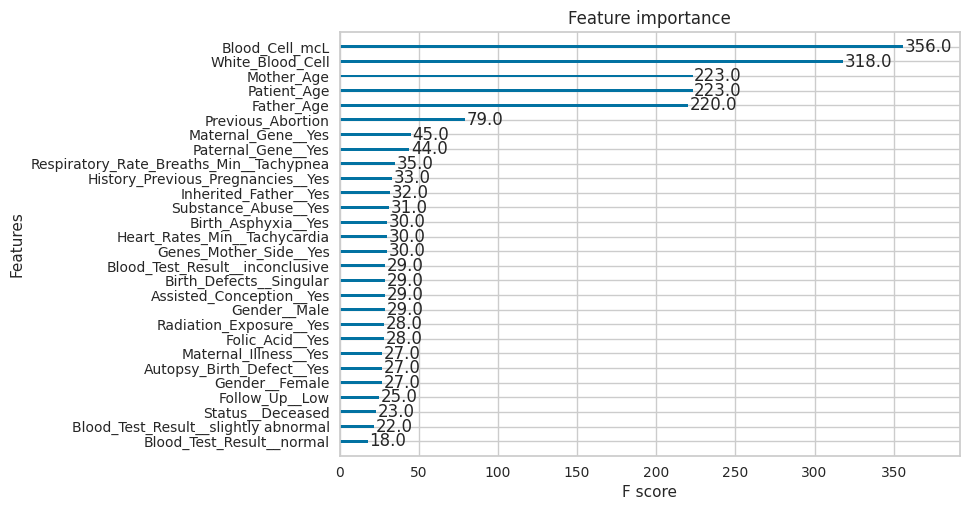

In [50]:
#This model also gave same feature name as above
from xgboost import plot_importance,XGBClassifier
model=XGBClassifier(n_estimators=1000,learning_rate=0.5)
#x_train,x_test,y_train,y_test=model_selection.train_test_split(features,label,test_size=0.2)
model.fit(GX_Train,GY_Train,early_stopping_rounds=5,eval_set=[(GX_Test,GY_Test)])
plot_importance(model)
plt.show()

In [51]:
#Correlation
cols = ['Patient_Age', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age','Previous_Abortion', 'White_Blood_Cell', 'Genetic_Disorder']
print(len(cols))
Genetic_Disorder_Data[cols].corr()

7


,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genetic_Disorder
Patient_Age,1.000000,0.009777,-0.006140,-0.008090,-0.007037,-0.008295,0.003933
Blood_Cell_mcL,0.009777,1.000000,-0.004397,0.003601,-0.007442,0.002469,0.002209
Mother_Age,-0.006140,-0.004397,1.000000,0.001280,0.010013,0.015617,0.001845
Father_Age,-0.008090,0.003601,0.001280,1.000000,0.000563,0.014544,0.007157
Previous_Abortion,-0.007037,-0.007442,0.010013,0.000563,1.000000,0.003813,-0.009557
White_Blood_Cell,-0.008295,0.002469,0.015617,0.014544,0.003813,1.000000,0.004183
Genetic_Disorder,0.003933,0.002209,0.001845,0.007157,-0.009557,0.004183,1.000000


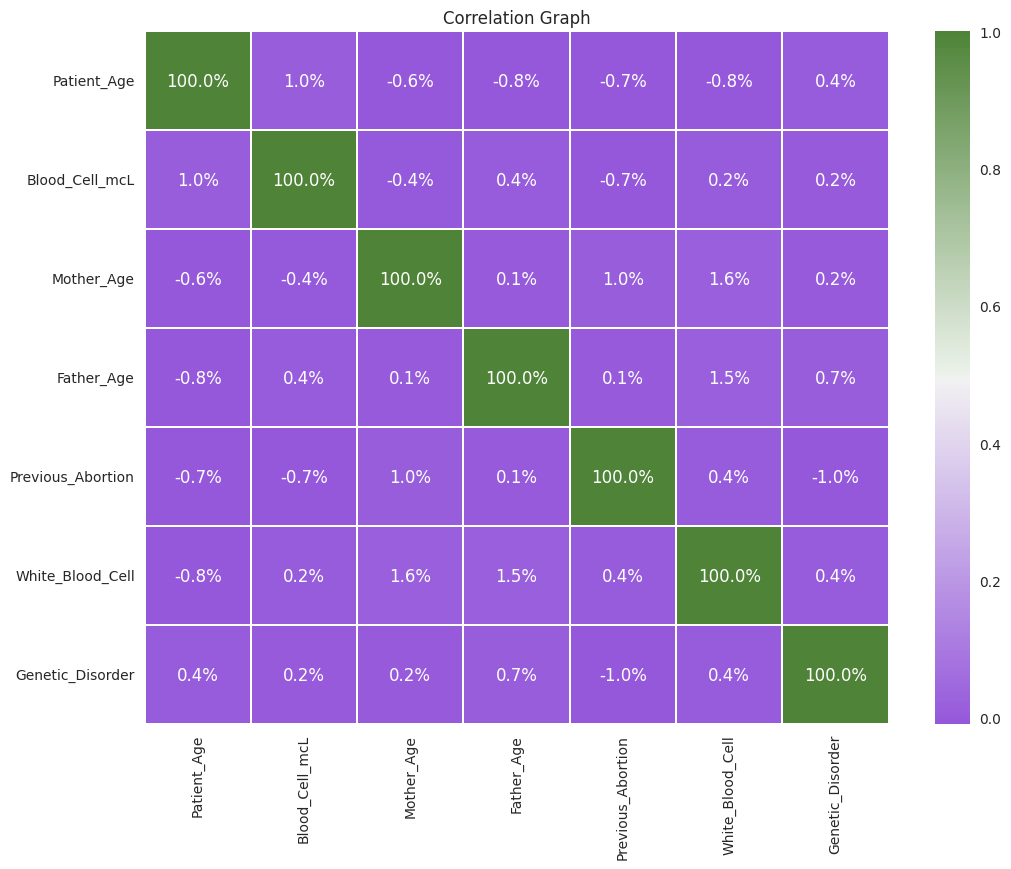

In [52]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(Genetic_Disorder_Data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [54]:
#corr2
#Correlation
cols2 = ['Genetic_Disorder','Autopsy_Birth_Defect__Yes','Folic_Acid__Yes','Maternal_Illness__Yes','Radiation_Exposure__Yes','Substance_Abuse__Yes','Assisted_Conception__Yes','History_Previous_Pregnancies__Yes']
print(len(cols2))
Genetic_Disorder_Data[cols2].corr()

8


,Genetic_Disorder,Autopsy_Birth_Defect__Yes,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes
Genetic_Disorder,1.000000,0.001681,-0.003209,-0.000014,-0.000549,0.003863,0.009365,-0.002443
Autopsy_Birth_Defect__Yes,0.001681,1.000000,0.003215,-0.002793,-0.001616,0.003416,0.001231,-0.002679
Folic_Acid__Yes,-0.003209,0.003215,1.000000,-0.000002,0.000617,-0.013859,-0.009101,0.015862
Maternal_Illness__Yes,-0.000014,-0.002793,-0.000002,1.000000,0.016363,-0.000254,0.003166,0.010535
Radiation_Exposure__Yes,-0.000549,-0.001616,0.000617,0.016363,1.000000,0.001887,0.001461,0.012971
Substance_Abuse__Yes,0.003863,0.003416,-0.013859,-0.000254,0.001887,1.000000,0.000480,-0.000450
Assisted_Conception__Yes,0.009365,0.001231,-0.009101,0.003166,0.001461,0.000480,1.000000,0.012626
History_Previous_Pregnancies__Yes,-0.002443,-0.002679,0.015862,0.010535,0.012971,-0.000450,0.012626,1.000000


<Axes: title={'center': 'Correlation Graph'}>

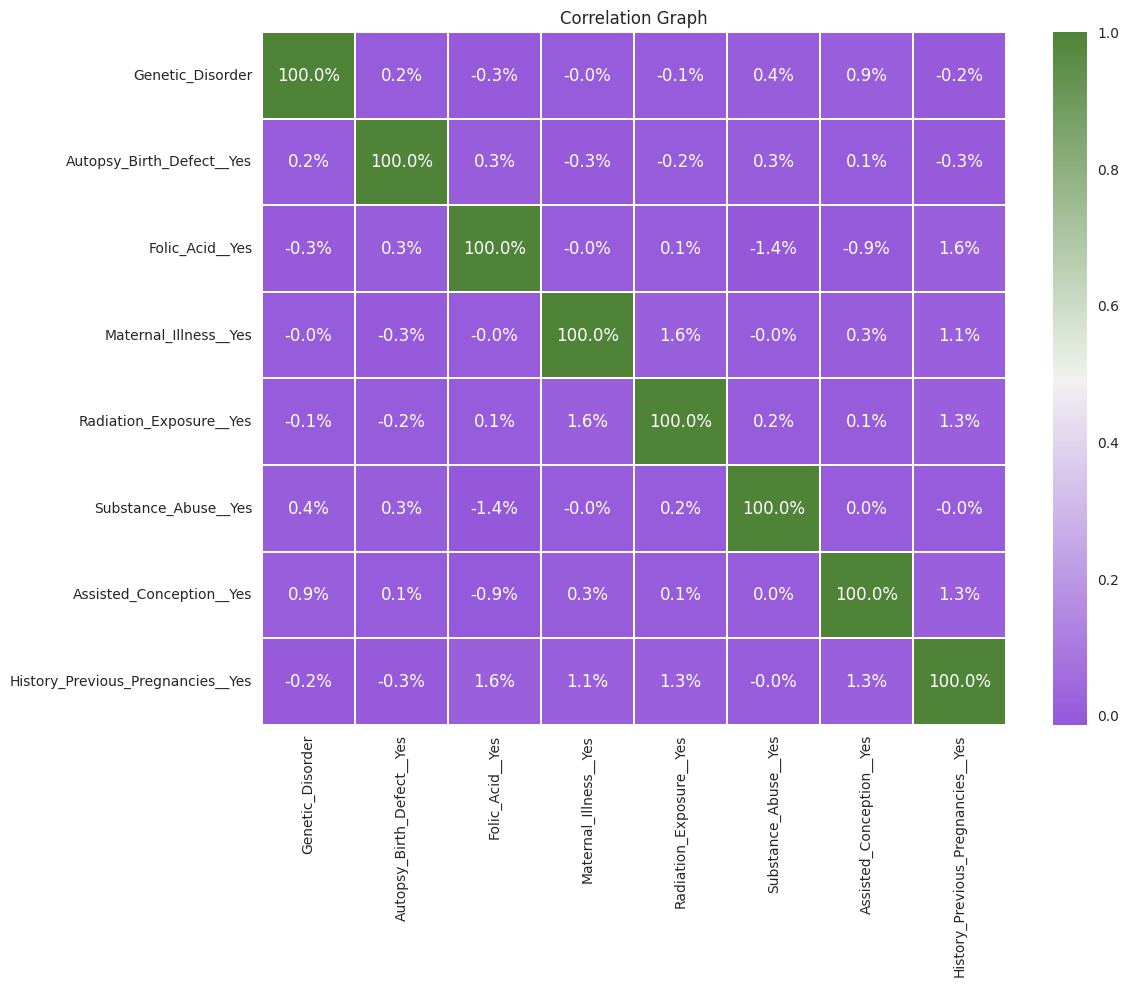

In [55]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(Genetic_Disorder_Data[cols2].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap)

In [56]:
Genetic_Disorder_Data

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genetic_Disorder,Genes_Mother_Side__Yes,Inherited_Father__Yes,Maternal_Gene__Yes,...,Folic_Acid__Yes,Maternal_Illness__Yes,Radiation_Exposure__Yes,Substance_Abuse__Yes,Assisted_Conception__Yes,History_Previous_Pregnancies__Yes,Birth_Defects__Singular,Blood_Test_Result__inconclusive,Blood_Test_Result__normal,Blood_Test_Result__slightly abnormal
0,2.0,4.760603,34.526454,41.972852,2.003062,9.857562,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,6.0,4.893297,41.000000,22.000000,4.000000,7.486224,1,1,0,0,...,1,0,1,0,1,1,1,0,1,0
3,12.0,4.705280,21.000000,41.972852,1.000000,7.919321,0,1,0,1,...,0,1,0,0,0,1,1,1,0,0
4,11.0,4.720703,32.000000,41.972852,4.000000,4.098210,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
5,14.0,5.103188,34.526454,41.972852,0.000000,10.272230,2,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22077,9.0,5.012599,47.000000,41.972852,2.003062,12.000000,0,0,1,1,...,1,0,0,0,1,1,0,0,0,1
22078,4.0,5.258298,35.000000,64.000000,3.000000,6.584811,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
22079,8.0,4.974220,34.526454,56.000000,2.000000,7.041556,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0
22080,8.0,5.186470,35.000000,51.000000,2.000000,7.715464,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


In [57]:
force_col_wise=true
from sklearn.svm import SVC
LR = LogisticRegression(solver="liblinear").fit(GX_Train,GY_Train)
GNB = GaussianNB().fit(GX_Train,GY_Train)
KNN = KNeighborsClassifier().fit(GX_Train,GY_Train)
CART = DecisionTreeClassifier(random_state=42).fit(GX_Train,GY_Train)
#Randomforest determine which features were the most “important” in predicting the target variable’s value.https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
RFC = RandomForestClassifier(random_state=42,verbose=False).fit(GX_Train,GY_Train)
GBC = GradientBoostingClassifier(verbose=False).fit(GX_Train,GY_Train)
XGBC = XGBClassifier().fit(GX_Train,GY_Train)
LGBMC = LGBMClassifier().fit(GX_Train,GY_Train)
CATBC = CatBoostClassifier(verbose=False).fit(GX_Train,GY_Train)
SVC = SVC(kernel="rbf",random_state=15)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 28
[LightGBM] [Info] Start training from score -0.674550
[LightGBM] [Info] Start training from score -2.248456
[LightGBM] [Info] Start training from score -0.954376


In [61]:
models = [LR,GNB,KNN,CART,RFC,GBC,XGBC,LGBMC,CATBC] #SVC]

In [62]:
for model in models:
    name = model.__class__.__name__
    predict = model.predict(GX_Test)
    R2CV = cross_val_score(model,GX_Test,GY_Test,cv=10,verbose=False).mean()
    error = -cross_val_score(model,GX_Test,GY_Test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(GY_Test,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.522437673130194
R2CV--> 0.5177285318559557
MEAN SQUARED ERROR--> 1.2789581979181965
------------------------------
GaussianNB: 
----------
ACC--> 0.5060941828254848
R2CV--> 0.502770083102493
MEAN SQUARED ERROR--> 1.2944586778642495
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.47534626038781164
R2CV--> 0.4606648199445983
MEAN SQUARED ERROR--> 1.3425695791251357
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.42686980609418285
R2CV--> 0.4337950138504155
MEAN SQUARED ERROR--> 1.3126277803515711
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.48670360110803323
R2CV--> 0.4914127423822715
MEAN SQUARED ERROR--> 1.3194685407075448
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.5121883656509695
R2CV--> 0.5030470914127424
MEAN SQUARED ERROR--> 1.2963832065722498
------------------------------
XGBClassifier: 
----------
ACC--> 0.48199445983

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix # to learn where did we wrong
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # normally "n" default value is 5.
knn.fit(GX_Train,GY_Train)
GY_pred = knn.predict(GX_Test)
cm = confusion_matrix(GY_Test,GY_pred)
acc = accuracy_score(GY_Test,GY_pred)
score = knn.score(GX_Test,GY_Test)

print("Score",score)
print("CM",cm)
print("Basic KNN Acc",acc)

Score 0.46842105263157896
CM [[1226   60  601]
 [ 239   11  103]
 [ 870   46  454]]
Basic KNN Acc 0.46842105263157896


In [64]:
def KNN_Best_Params(GX_Train,GX_Test,GY_Train,GY_Test):
    
    k_range = list(range(1,10))
    weight_options = ["uniform","distance"]
    metric = ["euclidean","manhattan","minkowski"]
    
    print()
    
    param_grid = dict(n_neighbors = k_range, weights = weight_options, metric=metric)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid, cv = 10, scoring = "accuracy")
    grid.fit(GX_Train,GY_Train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(GX_Train,GY_Train)
    
    y_pred_test = knn.predict(GX_Test)
    y_pred_train = knn.predict(GX_Train)
    
    cm_test = confusion_matrix(GY_Test, y_pred_test)
    cm_train = confusion_matrix(GY_Train, y_pred_train)
    
    acc_test = accuracy_score(GY_Test, y_pred_test)
    acc_train = accuracy_score(GY_Train, y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid


In [65]:
grid = KNN_Best_Params(GX_Train,GX_Test,GY_Train,GY_Test)


Best training score: 0.4692802487123817 with parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.4903047091412742, Train Score: 0.5829465955530927

CM Test:  [[1362   18  507]
 [ 269    4   80]
 [ 956   10  404]]
CM Train:  [[5930   33 1391]
 [1101   71  352]
 [3108   36 2415]]


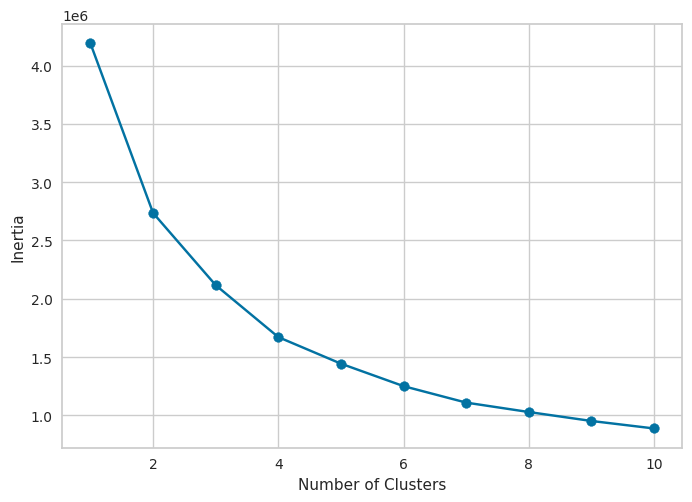

In [66]:
x=GENETIC_X
from sklearn.cluster import KMeans
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(x)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');


In [67]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Text(0.5, 1.0, 'PCA: p1 vs p2')

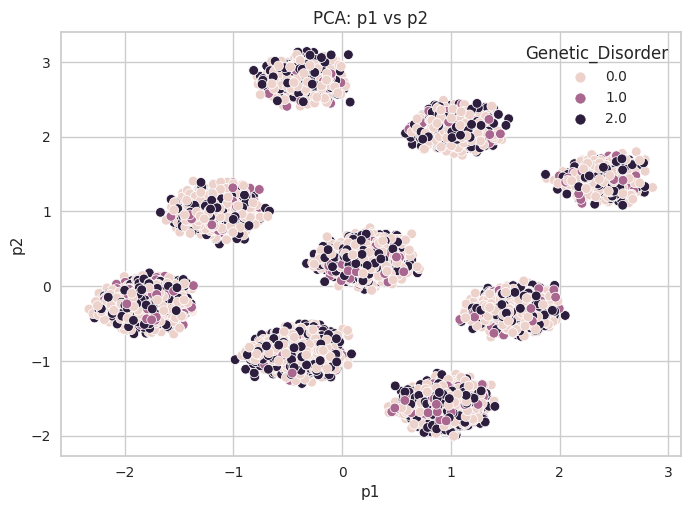

In [68]:
y=GENETIC_Y
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # scaling 30 to 2
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["Genetic_Disorder"] = y

sns.scatterplot(x = "p1", y = "p2", hue = "Genetic_Disorder", data = pca_data)
plt.title("PCA: p1 vs p2")

In [69]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.33, random_state = 42)

In [70]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score: 0.4750626499600107 with parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}

Test Score: 0.4709536601746138, Train Score: 0.6068149863534861

CM Test:  [[2196   40  831]
 [ 415   12  183]
 [1641   41  597]]
CM Train:  [[5223   49  902]
 [ 825   94  348]
 [2585   45 2020]]


In [71]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y) # it needs a target variable unlike PCA.
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["Genetic_Disorder"] = y

#sns.scatterplot(x = "p1",y = "p2", hue = "Genetic_Disorder", data = nca_data)
#plt.title("NCA: p1 vs p2")

In [72]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.33, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score: 0.493010410898974 with parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}

Test Score: 0.4964741437206179, Train Score: 0.6267471673145315

CM Test:  [[2234   67  766]
 [ 429   29  152]
 [1546   39  694]]
CM Train:  [[5299   60  815]
 [ 763  141  363]
 [2445   67 2138]]
